In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("diabetes (2).csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')   #'linear', 'poly', 'rbf', 'sigmoid'

In [12]:
svm.fit(X_train,y_train)

C:\Users\Sanjana Shankar\tf_env\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [13]:
ypred = svm.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

In [16]:
print(accuracy_score(y_test,ypred))

0.7532467532467533


In [17]:
print(confusion_matrix(y_test,ypred))

[[80 19]
 [19 36]]


In [18]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [23]:
fpr,tpr,thresh = roc_curve(y_test,ypred)

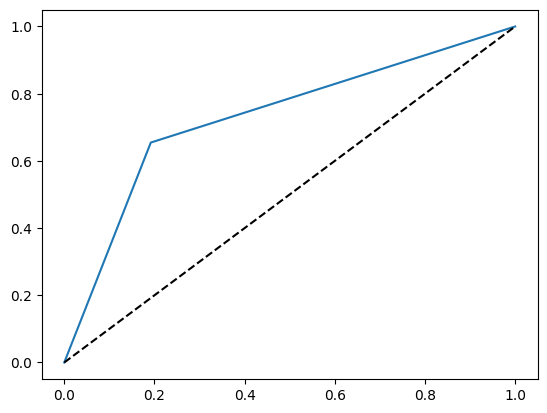

In [24]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')